# **Projet portant sur les réseaux de neurones**
### **Réalisé par Fréjoux Gaëtan et Niord Mathieu**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Développement d'un perceptron
α sera égal à 0.1

### 1.1. Mise en place d'un perceptron simple

* *Créer la fonction `perceptron_simple(x, w, active)`*

In [13]:
ALPHA = 0.1  # learning rate

def perceptron_simple(x, w, active):
  seuil = w[0]
  dot = np.dot(x, w[1:])
  x = seuil + dot
  return np.sign(x) if (active == 0) else np.tanh(x)


def plot_with_class(X, weight, c, title):
    x = np.linspace(-1, 2)
    y = (weight[0] + x*weight[1]) / (-weight[2])
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(x, y, 'r-')
    plt.grid()
    plt.show()

* *Tester votre perceptron avec l'exemple du OU logique vu en cours (en utilisant la fonction `sign(x)` comme fonction d'activation)*

In [11]:
W_OR = np.array([-0.5, 1, 1])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Result_OR = perceptron_simple(X, W_OR, 0) # TODO: fix this pcq j'ai pas compris son truc avec sign(x)

* *Afficher dans le cadre de l'exemple du OU logique sur la même figure les différents éléments de l'ensemble d'apprentissage et la droite séparatrice associée aux poids du neurone sur la même figure*

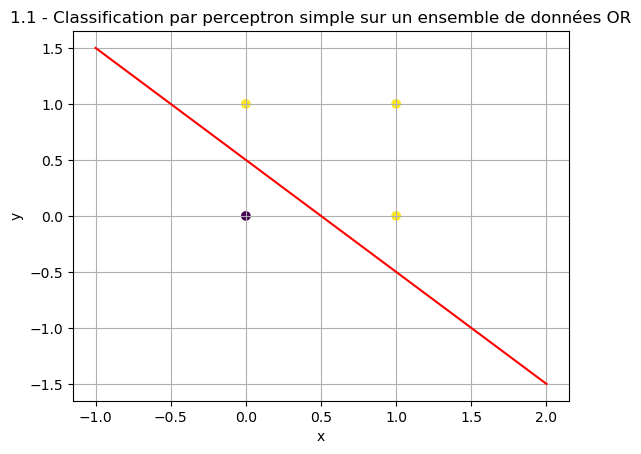

In [15]:
plot_with_class(X, W_OR, Result_OR, "1.1 - Classification par perceptron simple sur un ensemble de données OR")

### 1.2. Etude de l'apprentissage

#### 1.2.1. Programmation apprentissage Widrow-Hoff

* *Créer la fonction `apprentissage_widrow(x, yd, epoch, batch_size)`. La droite séparatrice et les points d'apprentissage doivent être affichés à chaque itération (une itération correspond à la présentation de tous les individus de l'ensemble d'apprentissage), ains que l'erreur de classification*

In [4]:
def apprentissage_widrow(x, yd, epoch, batch_size):
    w = np.random.randn(3)
    erreur = []
    for i in range(epoch):
        w_temp = w
        erreur.append(0)
        for j in range(len(x)):
            y = perceptron_simple(x[j], w, 1)  # with tanh
            r = - (yd[j] - y) * (1 - y * y)
            w_temp += ALPHA * r * np.array([1, x[j][0], x[j][1]])
            erreur[i] += r**2
            if (j % batch_size) == 0: w = w_temp
        print("Epoch ", i + 1, " : ", erreur[i]) # Errr value display
        if (erreur[i] == 0 or (i != 0 and (erreur[i - 1] - erreur[i] == 0))): break
    return w, erreur

#### 1.2.2. Test 1 simple

* *Charger les données p2_d1.txt*

In [5]:
Data = np.loadtxt(URL_P2_D1)
CLASSIF = [1]*25 + [-1]*25

* *Appliquer l'algorithme d'apprentissage sur les données. Afficher l'évolution de l'erreur. Vérifier que la frontière est correcte*

In [8]:
w1, erreur1 = apprentissage_widrow(Data.T, CLASSIF, 10, 10)
print('W1 : ', w1, '\nErreur : ', erreur1)

Epoch  1  :  8.991433008227409
Epoch  2  :  6.353932569290491
Epoch  3  :  3.245250184731594
Epoch  4  :  2.7761666189438876
Epoch  5  :  2.5136190150540134
Epoch  6  :  2.3353165525334907
Epoch  7  :  2.20390411236833
Epoch  8  :  2.0991350856946838
Epoch  9  :  2.0087646412741598
Epoch  10  :  1.9256749698516795
W1 :  [ 0.00859356  3.1952535  -0.35094886] 
Erreur :  [8.991433008227409, 6.353932569290491, 3.245250184731594, 2.7761666189438876, 2.5136190150540134, 2.3353165525334907, 2.20390411236833, 2.0991350856946838, 2.0087646412741598, 1.9256749698516795]


TODO commentaires

#### 1.2.3. Test 2

* *Charger les données p2_d2.txt*

In [ ]:
Data = np.loadtxt(URL_P2_D2)

* *Appliquer l'algorithme d'apprentissage sur les données. Afficher l'évolution de l'erreur. Vérifier que la frontière est correcte*

In [18]:
w2, erreur2 = apprentissage_widrow(Data.T, CLASSIF, 10, 25)
print('W2 : ', w2, '\nErreur : ', erreur2)

Epoch  1  :  5.7550118534355015
Epoch  2  :  1.8198406743460622
Epoch  3  :  1.3342172952793954
Epoch  4  :  1.0005040524226927
Epoch  5  :  0.7816214953382061
Epoch  6  :  0.6359989526877807
Epoch  7  :  0.5391588447601224
Epoch  8  :  0.47856377099357444
Epoch  9  :  0.44899321452364105
Epoch  10  :  0.45039675103936305
W2 :  [-0.74605247  3.19733566  0.16183968] 
Erreur :  [5.7550118534355015, 1.8198406743460622, 1.3342172952793954, 1.0005040524226927, 0.7816214953382061, 0.6359989526877807, 0.5391588447601224, 0.47856377099357444, 0.44899321452364105, 0.45039675103936305]


TODO commentaires

* *Comparer les résultats avec les premières données et conclure*

TODO comparaison + conclusion

### 1.3 Perceptron multicouches

#### 1.3.1. Mise en place d'un perceptron multicouche

* *Créer la fonction `multiperceptron(x, w1, w2)`*

In [31]:
def multiperceptron(x, w1, w2):

  def activation(x):
      return 1 / (1 + np.exp(-x))  # sigmoid

  u1 = np.dot(
    np.array([w1[0][0], w1[1, 0], w1[2, 0]]),
    np.array([1, x[0], x[1]])
  )
  y1 = activation(u1)
  u2 = np.dot(
    np.array([w1[0][1], w1[1, 1], w1[2, 1]]),
    np.array([1, x[0], x[1]])
  )
  y2 = activation(u2)
  uf = np.dot(w2, np.array([1, y1, y2]))
  yf = activation(uf)

  return y1, y2, yf

* *Tester votre perceptron multicouches avec l'exemple ci-dessous pour un entrée x = [1 1]' :*  
  
<img src="exemple_1_3_1.jpg" width="600">

In [37]:
x = np.array([1, 1])
w1 = np.array([[-.5, .5], [2., .5], [-1., 1.]])
w2 = np.array([2., -1., 1.])

print(multiperceptron(x, w1, w2)[2])

0.9053673095402572


#### 1.3.2. Programmation apprentissage multicouches

* *Créer une fonction `multiperceptron_widrow(x, yd, epoch, batch_size)`*

In [48]:
ALPHA = 0.5
W1_INIT = np.array([[0.] * 2, [0.] * 2, [0.] * 2])
W2_INIT = np.array([0., 0., 0.])

def multiperceptron_widrow(x, yd, epoch, batch_size):
  
  w1 = np.array([np.random.rand(2), np.random.rand(2), np.random.rand(2)])
  w2 = np.random.rand(3)
  error = [0] * epoch
  
  for i in range(epoch):

    temp_w1 = W1_INIT
    temp_w2 = W2_INIT

    for j in range(x.shape[1]):

      y1, y2, yf = multiperceptron(x[:,j], w1, w2)
      L = (yd[j] - yf)
      error[i] += L**2
      rf = -L * (yf * (1 - yf))
      E = ALPHA * rf

      temp_w2 -= np.array([E, E * y1, E * y2])
      
      wy1 = E * w2[1] * (y1 * (1 - y1))
      wy2 = E * w2[2] * (y2 * (1 - y2))
      temp_w1[:,0] -= np.array([wy1, wy1 * x[0,j], wy1 * x[1,j]])
      temp_w1[:,1] -= np.array([wy2, wy2 * x[0,j], wy2 * x[1,j]])

      if ((j + 1) % batch_size == 0) or (j == (x.shape[1] - 1)):
        w2 += temp_w2
        w1 += temp_w1
        temp_w1 = W1_INIT
        temp_w2 = W2_INIT

  return w1, w2, error

* *Créer l'ensemble d'apprentissage*

In [49]:
x = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
yd = np.array([0, 1, 1, 0])
epoch = 100

w1, w2, erreur = multiperceptron_widrow(x, yd, epoch, 2)
print(erreur)

[1.2729102491216326, 1.1346379710097743, 1.0059030673161193, 1.1010438181604636, 1.2508166283796527, 1.2784928273230989, 1.1703691856919805, 1.0281802152480677, 1.0561432696549997, 1.193935103263047, 1.2576845020556568, 1.2016673784014413, 1.0695625017323633, 1.0031017620946827, 1.0799538812261749, 1.1858972024344374, 1.2277498809049754, 1.1902858540341863, 1.0959133508861805, 1.01230168604466, 1.0213405435434608, 1.1092204364763403, 1.191611798559922, 1.218124566565283, 1.1793705944387853, 1.0930985404360753, 1.017054782837175, 1.023376022373461, 1.1045856677469876, 1.1854072079975337, 1.2148860864768578, 1.1805547634628923, 1.096859976865464, 1.0177604579175938, 1.0172954810622707, 1.0958773150710588, 1.1796800746938496, 1.2143905424959143, 1.1852109890638292, 1.1040868455539372, 1.0212176894889036, 1.0123128042958087, 1.0867720058614714, 1.1730400828768597, 1.2129512175544135, 1.1890406377442817, 1.1109887403681031, 1.025479341915315, 1.0089719146051102, 1.0790674157594826, 1.167228

* *Afficher cet ensemble avec la fonction affiche_classe*

In [51]:
#TODO

* *Pensez-vous que ce problème puisse être traité par un perceptron simple ?*

In [ ]:
#TODO

* *Appliquer votre algorithme d'apprentissage*

In [ ]:
#TODO

* *Tester, à partir de votre fonction `multiperceptron`, le réseau de neurones ainsi obtenu sur l'ensemble d'apprentissage*

In [ ]:
#TODO

* *Afficher les droites séparatrices associées aux différents neurones et les points de l'ensemble d'apprentissage*

In [ ]:
#TODO

## 2. Deep et Full-connected : discrimination d'une image

### 2.1. Approche basée Descripteurs (basé modèle)

#### 2.1.1. Calcul des descripteurs

* *Importer les différents tableaux de mesure et créer un vecteur de label indiquant la classe sous forme d'un chiffre de chauqe image*

In [ ]:
#TODO

#### 2.1.2. Mise en place d'un système de discrimination basé structure Full-Connected

* *Mettre en place un système de discrimination qui pour la présentation d'une image inconnue et de son vecteur de mesures associé propose une classe*

* *Tester la procédure de la classification avec les 5 types de mesures et différentes images incoonues*

In [ ]:
#TODO

* *Analyser les résultats (matrice de confusion, taux d'erreur)*

In [ ]:
#TODO

TODO commentaires

* *Comparer avec différents hyperparamètres ????(nombre de neurones, nombre de couches, nombre d'itérations, taille du batch)????*

In [ ]:
#TODO

TODO commentaires

#### 2.1.3. Approche "Deep" (basée Data)

* *Mettre en place un système de classification qui a en données une image, calcul les descripteurs par des couches de convolution*

In [ ]:
#TODO

* *Tester des structures simples*

* *Etudier l'influence des paramètres*

* *Etudier l'évolution de la fonction de coût*

* *Comparer avec les résultats avec les méthodes basées caractéristiques*

* *Tester avec des structures plus complexes. La "Data augmentation" doit probablement être utilisée*

In [ ]:
#TODO